# Data Analysis of iTunes Podcast Reviews

> _In this project, we analyze a vast dataset comprising 2 million iTunes podcast reviews spanning 100,000 unique podcasts, with monthly updates. Our investigation involves rigorous exploratory data analysis, robust statistical testing, and the development of a powerful machine learning model leveraging Google's BERT framework._
>
> _This project seeks to provide valuable insights into the analysis of textual feedback and review data, offering a rich resource for understanding the evolving landscape of podcast reviews and user sentiments._

In [60]:
# ITUNES PODCAST REVIEWS
# ----------------------------------------------------------------------------------------------------------------


# INITIATION ------------

# System information
import os

# Data preparation
import pandas as pd
import sqlite3 as sql
# import duckdb

# Data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
import seaborn as sns


# Data transformation & algorithms
import numpy as np
import scipy as sp

# Data modeling
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


# Miscellaneous
import math
from tabulate import tabulate
from wordcloud import WordCloud
from processes import \
    preparation, \
    transformation, \
    cleaning, \
    visualization, \
    modeling

print(
    'CURRENT DIRECTORY:\n'
    '. = \"', os.getcwd(), '\"', sep=''
)

for dirName, _, filenames in os.walk('.'):
    if dirName[2:3] != '.' and '__pycache__' not in dirName:
        if dirName in ('.\\bert', ):
            print(f'\n{dirName}\n...', sep='')
        elif dirName[:6] != '.\\bert':
            print('\n', dirName, sep='')
            for filename in filenames:
                print(os.path.join(dirName, filename))


CURRENT DIRECTORY:
. = "D:\Documents\Projects\DS\Turing\2 Data Analysis\S2\Project"

.
.\.gitignore
.\225.ipynb
.\identifier.sqlite
.\iTunesPodcastReviews_DA - Copy.ipynb
.\iTunesPodcastReviews_DA.ipynb
.\LICENSE
.\README.md
.\requirements.txt

.\bert
...

.\data
.\data\Categories.xlsx
.\data\database.sqlite
.\data\Podcasts.xlsx
.\data\Reviews - Copy.xlsx
.\data\Reviews.xlsx
.\data\Reviews_0.xlsx

.\plots
.\plots\cloud_1.png
.\plots\cloud_2.png
.\plots\cloud_3.png
.\plots\cloud_4.png
.\plots\cloud_5.png
.\plots\cloud_6.png

.\processes
.\processes\cleaning.py
.\processes\modeling.py
.\processes\preparation.py
.\processes\transformation.py
.\processes\visualization.py

.\processes\tools
.\processes\tools\modify_cls.py


## Data Familiarization


In [2]:
# EXECUTION -------------

# Display plots directly in the notebook interface
%matplotlib inline

# Connect to database
con = sql.connect('./data/database.sqlite')


### Categories data:

In [3]:
# Import Categories data into pandas
Categories = pd.read_sql('SELECT * FROM categories', con)

# First 10 observations
print('CATEGORIES')
Categories.recap(n_rows=10)


CATEGORIES
Number of Observations: 212372; 
Number of Features: 2.
- Categorical features: podcast_id, category; 
- Numerical features: .


,podcast_id,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music
3,ad4f2bf69c72b8db75978423c25f379e,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts-design
5,ad4f2bf69c72b8db75978423c25f379e,education
6,ad4f2bf69c72b8db75978423c25f379e,society-culture
7,f2970432aad718a000ebac10e48ae6b0,arts
8,f2970432aad718a000ebac10e48ae6b0,arts-performing-arts
9,f2970432aad718a000ebac10e48ae6b0,society-culture


### Podcasts data:

In [4]:
# Import Podcasts data into pandas
Podcasts = pd.read_sql('SELECT * FROM podcasts', con)

# First 10 observations
print('PODCASTS')
Podcasts.recap(n_rows=10)


PODCASTS
Number of Observations: 110024; 
Number of Features: 5.
- Categorical features: podcast_id, slug, itunes_url, title; 
- Numerical features: itunes_id.


,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000a500f06555f81220c3eb641aded7,1544900779,word-on-the-street-w-dreak-swift,https://podcasts.apple.com/us/podcast/word-on-...,Word on the Street w/ Dreak Swift
5,a000aa69852b276565c4f5eb9cdd999b,1342447811,speedway-soccer,https://podcasts.apple.com/us/podcast/speedway...,Speedway Soccer
6,a000b6538cca860a11a94607c13e9595,1568973037,showing-up-for-you,https://podcasts.apple.com/us/podcast/showing-...,Showing Up for You
7,a0010b283ba17d282c7bb1f9709f0ac3,1285218356,bethany-baptist-church-bellflower-ca,https://podcasts.apple.com/us/podcast/bethany-...,"Bethany Baptist Church, Bellflower CA"
8,a0013c50c1e6b24266fdeb10eed6eea7,1448380200,mindful-communication-podcast,https://podcasts.apple.com/us/podcast/mindful-...,Mindful Communication Podcast
9,a00155a1dc1d1b9ef4d2d573982207c6,1500634531,marvels,https://podcasts.apple.com/us/podcast/marvels/...,MARVELS


### Reviews data:

In [5]:
# Import Reviews data into pandas
Reviews = pd.read_sql('SELECT * FROM reviews', con)

# First 10 observations
print('REVIEWS')
Reviews.recap(n_rows=10)


REVIEWS
Number of Observations: 2067529; 
Number of Features: 6.
- Categorical features: podcast_id, title, content, author_id, created_at; 
- Numerical features: rating.


,podcast_id,title,content,rating,author_id,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00
2,ad4f2bf69c72b8db75978423c25f379e,nauseatingly left,"I'm a liberal myself, but its pretty obvious a...",1,1AB95B8E6E1309E,2019-06-11T14:53:39-07:00
3,ad4f2bf69c72b8db75978423c25f379e,Diverse stories,I find Tedx talks very inspirational but I oft...,5,11BB760AA5DEBD1,2018-05-31T13:08:09-07:00
4,ad4f2bf69c72b8db75978423c25f379e,👍👍👍👍,"I love this podcast, it is so good.",5,D86032C8E57D15A,2019-06-19T13:56:05-07:00
5,ad4f2bf69c72b8db75978423c25f379e,Waste of time,I listened to the “Spanish Flu” pod cast. Afte...,1,67A452C80BCBEEC,2019-01-09T09:07:09-07:00
6,ad4f2bf69c72b8db75978423c25f379e,Too much victimology,Too much BS trying to convince me of how racis...,3,265ADD6AB150C41,2019-02-02T10:15:25-07:00
7,ad4f2bf69c72b8db75978423c25f379e,Politically biased,I would love to hear topics discussed without ...,1,C27BC8C2D6F5A4A,2019-01-01T09:47:11-07:00
8,ad4f2bf69c72b8db75978423c25f379e,😀😃,Ok so I am in love with this podcast.,5,218EE494C8C787F,2019-05-09T17:50:14-07:00
9,ad4f2bf69c72b8db75978423c25f379e,Volume???,"Great podcast, but the editors turn the volume...",1,DC6DBB8C4D9B2E5,2019-06-25T05:05:24-07:00


## Data Preparation
...

### Data cleaning:
First, any observations with erroneous values that are in unsuitable formats or missing values will be handled.

In [6]:
# HANDLING ERRONEOUS VALUES

# Cleaning the dataset
print('CATEGORIES')
if Categories.has_nan() or Categories.has_na():
    ## Observations with erroneous non-numeric data are removed;
    Categories.dropna(subset=''.split(', '), inplace=True)

    ## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
    Categories.fillna(Categories.median(numeric_only=True, skipna=True), inplace=True)

print('\nPODCASTS')
if Podcasts.has_nan() or Podcasts.has_na():
    ## Observations with erroneous non-numeric data are removed;
    Podcasts.dropna(subset=''.split(', '), inplace=True)

    ## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
    Podcasts.fillna(value=Podcasts.median(numeric_only=True, skipna=True), inplace=True)

print('\nREVIEWS')
if Reviews.has_nan() or Reviews.has_na():
    ## Observations with erroneous non-numeric data are removed;
    Reviews.dropna(subset=''.split(', '), inplace=True)

    ## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
    Reviews.fillna(value=Reviews.median(numeric_only=True, skipna=True), inplace=True)

print('\n# All datasets no longer contain unrepresentable or missing data.')


CATEGORIES
Invalid values not found.
Missing values not found.

PODCASTS
Invalid values not found.
Missing values not found.

REVIEWS
Invalid values not found.
Missing values not found.

# All datasets no longer contain unrepresentable or missing data.


Second, any duplicate samples and features based on the podcasts' IDs will be investigated further from the 3
datasets
to understand the reasons behind these duplicates and to avoid redundancy and bias.

In [7]:
# REMOVING DUPLICATE SAMPLES & FEATURES

# Remove duplicated IDs
print('CATEGORIES')
ifDup_c = Categories.has_duplicates('podcast_id', rm=False)

print('\nPODCASTS')
ifDup_p = Podcasts.has_duplicates('podcast_id', rm=False)

print('\nREVIEWS')
ifDup_r = Reviews.has_duplicates('podcast_id', rm=False)


CATEGORIES
Duplicates in Podcast_id found.
- No. Unique Values: 110024
- Duplicated Values: c61aa81c9b929a66f0c1db6cbe5d8548, c61aa81c9b929a66f0c1db6cbe5d8548, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, f2970432aad718a000ebac10e48ae6b0, f2970432aad718a000ebac10e48ae6b0, f90b974d49b86b2d4d1769519fb478c0, f90b974d49b86b2d4d1769519fb478c0, f90b974d49b86b2d4d1769519fb478c0, ...

PODCASTS
Duplicated IDs not found.

REVIEWS
Duplicates in Podcast_id found.
- No. Unique Values: 111544
- Duplicated Values: c61aa81c9b929a66f0c1db6cbe5d8548, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ad4f2bf69c72b8db75978423c25f379e, ...


In [8]:
print(
    f"Number of distinct podcasts in data: "
    f"{pd.concat([Categories['podcast_id'], Podcasts['podcast_id'], Reviews['podcast_id']]).nunique()}\n"
    f"- Categories: {Categories['podcast_id'].nunique()}\n"
    f"- Podcasts: {Podcasts['podcast_id'].nunique()}\n"
    f"- Reviews: {Reviews['podcast_id'].nunique()}"
)


Number of distinct podcasts in data: 111544
- Categories: 110024
- Podcasts: 110024
- Reviews: 111544


### Update the Categories, Podcasts, & Reviews datasets:

In [9]:
# Map of podcast IDs in Python
id_old = Podcasts['podcast_id'].unique()
podcast_id = dict(zip(id_old, range(1, Podcasts['podcast_id'].nunique() + 1)))

con.execute(
    """
    DROP TABLE IF EXISTS Map
    ;
    """
)

# Map of podcast IDs in SQL
con.execute(
    """
    CREATE TABLE Map AS
    SELECT podcast_id AS id_old, ROW_NUMBER() OVER () AS podcast_id
    FROM Podcasts
    ;
    """
)

con.execute(
    """
    CREATE UNIQUE INDEX id_old
    ON Map (id_old)
    ;
    """
)

Map = pd.read_sql(
    """
    SELECT *
    FROM Map
    LIMIT 10
    ;
    """,
    con,
    index_col='id_old'
)

print('NEW ID')
Map.recap(n_rows=10)


NEW ID
Number of Observations: 10; 
Number of Features: 1.
- Categorical features: ; 
- Numerical features: podcast_id.


,podcast_id
id_old,
a00018b54eb342567c94dacfb2a3e504,1
a00043d34e734b09246d17dc5d56f63c,2
a0004b1ef445af9dc84dad1e7821b1e3,3
a00071f9aaae9ac725c3a586701abf4d,4
a000a500f06555f81220c3eb641aded7,5
a000aa69852b276565c4f5eb9cdd999b,6
a000b6538cca860a11a94607c13e9595,7
a0010b283ba17d282c7bb1f9709f0ac3,8
a0013c50c1e6b24266fdeb10eed6eea7,9


In [10]:
con.execute(
    """
    -- Remove old updated Categories dataset
    DROP TABLE IF EXISTS Categories_updated;
    """
)

con.execute(
    """
    CREATE TABLE Categories_updated AS
    SELECT Map.podcast_id, Categories.category
    FROM Map, Categories
    WHERE Categories.podcast_id = Map.id_old
    """
)

Categories = pd.read_sql("SELECT * FROM Categories_updated", con)

print('UPDATED CATEGORIES')
Categories.recap(n_rows=10)


UPDATED CATEGORIES
Number of Observations: 212372; 
Number of Features: 2.
- Categorical features: category; 
- Numerical features: podcast_id.


,podcast_id,category
0,43693,arts
1,43693,arts-performing-arts
2,43693,music
3,15262,arts
4,15262,arts-design
5,15262,education
6,15262,society-culture
7,94740,arts
8,94740,arts-performing-arts
9,94740,society-culture


In [11]:
con.execute(
    """
    -- Remove old updated Podcasts dataset
    DROP TABLE IF EXISTS Podcasts_updated;
    """
)

con.execute(
    """
    CREATE TABLE Podcasts_updated AS
    SELECT Map.podcast_id, Podcasts.title
    FROM Map, Podcasts
    WHERE Podcasts.podcast_id = Map.id_old
    """
)

con.execute(
    """
    CREATE UNIQUE INDEX podcast_id
    ON Podcasts_updated (podcast_id);
    """
)

Podcasts = pd.read_sql("SELECT * FROM Podcasts_updated", con, index_col='podcast_id')

print('UPDATED PODCASTS')
Podcasts.recap(n_rows=10)


UPDATED PODCASTS
Number of Observations: 110024; 
Number of Features: 1.
- Categorical features: title; 
- Numerical features: .


,title
podcast_id,
1,Scaling Global
2,Cornerstone Baptist Church of Orlando
3,Mystery: Dancing in the Dark
4,KTs Money Matters
5,Word on the Street w/ Dreak Swift
6,Speedway Soccer
7,Showing Up for You
8,"Bethany Baptist Church, Bellflower CA"
9,Mindful Communication Podcast


In [12]:
Reviews = Reviews.copy()[Reviews['podcast_id'].isin(id_old)]
Reviews['podcast_id'] = Reviews['podcast_id'].map(podcast_id)

Reviews.to_sql('Reviews_updated', con, if_exists='replace', index=False)

Reviews['created_at'] = pd.to_datetime(Reviews['created_at'])

# Reorder reviews based on ids and date created
Reviews.sort_values(by=['podcast_id', 'created_at'], inplace=True)

print('UPDATED REVIEWS')
Reviews.recap(n_rows=10)


UPDATED REVIEWS
Number of Observations: 2043297; 
Number of Features: 6.
- Categorical features: title, content, author_id; 
- Numerical features: podcast_id, rating.


,podcast_id,title,content,rating,author_id,created_at
604710,1,Very informative,Great variety of speakers!,5,CC47C85896D423B,2017-11-29 12:16:43-07:00
604711,2,Good Sernons,I'm a regular listener. I only wish that the ...,5,103CC9DA2046218,2019-10-08 04:23:32-07:00
604712,3,Weird,Thts so weird... However made tht is weird. Du...,1,9D7AB51348639C7,2011-09-06 14:11:08-07:00
99854,4,"Great show, great advice","So excited to have this come to reality, well ...",5,37E4CA7C4E15D4C,2018-01-16 18:57:38-07:00
99853,4,Very Insightful!,Really enjoy this podcast! Quick and to the po...,5,19387A136DD3305,2018-01-18 21:59:11-07:00
99856,4,Inspiration & Information,Inspiration & Information that transforms busi...,5,DA98C96DE6A9629,2018-05-11 18:40:15-07:00
99855,4,Love your show!,"Hi KT, I love listening to your show and I hav...",5,752FA4C3B648001,2018-11-24 17:06:55-07:00
2007618,5,All in one,Word on the Street w/ Dreak Swift is one of th...,5,5B06340911B0B24,2021-05-10 11:27:43-07:00
2007619,5,100 best podcast,"Best podcast ever, don’t want to miss out plus...",5,A2E8CD662BD263F,2021-07-06 13:57:57-07:00
568839,6,Independent Nashville Soccer Content,Independent Nashville Soccer Content.,5,F0B119E5348C41C,2018-01-31 21:09:40-07:00


### Checking outliers:
...

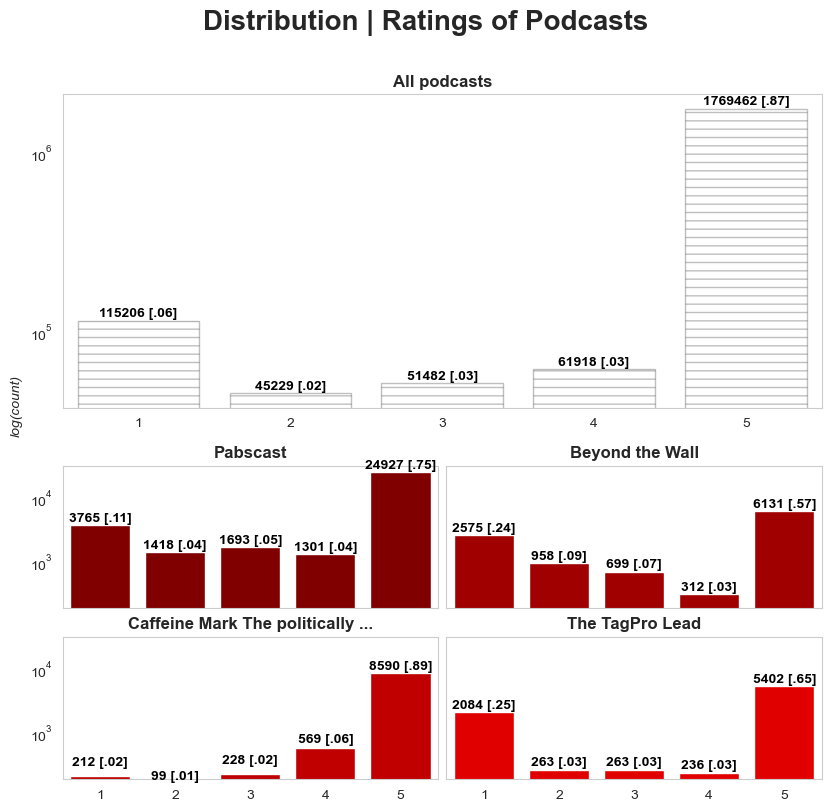

In [13]:
# Select Reviews data of the 4 most rated podcasts
podcasts_top4 = Reviews['podcast_id'].value_counts()[:4].index
Reviews_top4 = Reviews[Reviews['podcast_id'].isin(podcasts_top4)]

# Create a figure with 2 subfigures
figure = plt.figure(layout='constrained', figsize=(8, 8))
subfigures = figure.subfigures(2, 1)
colors = [
    '#800000', '#A00000', '#C00000', '#E00000',
    '#FF0000', '#FF3333', '#FF6666', '#FF9999',
    '#FFCCCC', '#FFDDDD'
]
# Create 1 big subplot in first subfigure
axes_top = subfigures[0].subplots(1, 1)

mpl.rcParams['hatch.linewidth'] = 1
counts = np.bincount(Reviews['rating'])[1:]

for bar in axes_top.bar(
        np.arange(len(counts)) + 1,
        counts,
        color='none',
        hatch='--',
        edgecolor='black',
        alpha=.25
):
    height = bar.get_height()
    axes_top.text(bar.get_x() + bar.get_width()/2, 1.18*height,
                  f'{int(height)} [{str(round(int(height)/len(Reviews), 2))[1:]}]',
                  ha='center', va='top', color='black', fontweight='bold')

# Adjust layout and title
axes_top.set_title('All podcasts', fontweight='bold')
axes_top.set_yscale('log')
axes_top.set_xlim(0.5, 5.5)
axes_top.grid(visible=False)

# Create 4 small subplots in second subfigure
axes_bottom = subfigures[1].subplots(2, 2, sharey=True)
axes_bottom = np.array(axes_bottom).flatten()

for (n, ax), pod in zip(enumerate(axes_bottom), podcasts_top4):
    data = Reviews_top4['rating'][Reviews_top4['podcast_id'] == pod]
    counts = np.bincount(data)[1:]
    for bar in ax.bar(
        np.arange(len(counts)) + 1,
        counts,
        color=colors[n],
        alpha=1
    ):
        height = bar.get_height()
        if n == 2:
            ax.text(bar.get_x() + bar.get_width()/2, 100 + 1.55*height,
                    f'{int(height)} [{str(round(int(height)/len(data), 2))[1:]}]',
                    ha='center', va='top', color='black', fontweight='bold')
        else:
            ax.text(bar.get_x() + bar.get_width()/2, 1.6*height,
                    f'{int(height)} [{str(round(int(height)/len(data), 2))[1:]}]',
                    ha='center', va='top', color='black', fontweight='bold')

    title = Podcasts.iloc[pod]['title']
    ax.set_title(title if len(title) < 30 else f'{title[:30]}...', fontsize=12, fontweight='bold')
    if n < 2:
        ax.set_xticklabels([])
    if not n%2:
        ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.set_xlim(0.5, 5.5)
    ax.grid(visible=False)

# Adjust layout and title
figure.text(-.02, .5, 'log(count)', va='center', rotation='vertical', style='italic')
figure.suptitle(
    'Distribution | Ratings of Podcasts\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)

# Display the plot
plt.show()


..........................

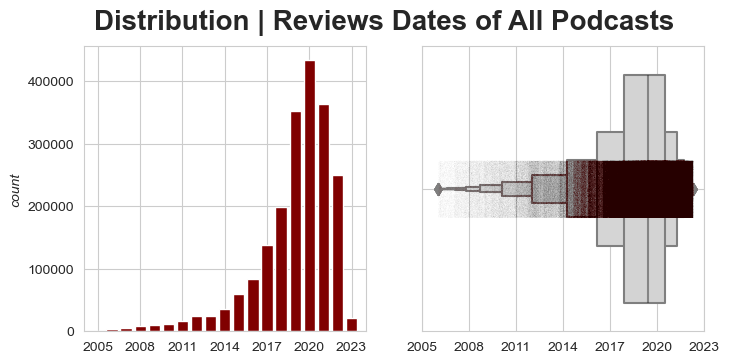

In [14]:
# Obtain the year data for each review
data = Reviews['created_at'].dt.year

# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=2,
    nrows=1,
    dpi=100,
    figsize=(8, 3.7)
)

axes = np.array(axes).flatten()

# Add barchart of time created
counts = data.value_counts()

for bar in axes[0].bar(
        counts.index,
        counts,
        color=colors[0],
        alpha=1
):
    pass

axes[0].set_xticks(range(2005, 2024, 3))
axes[0].set_xticklabels(range(2005, 2024, 3))
axes[0].set_ylabel('count', style='italic')
axes[0].set_xlim(2004, 2024)
axes[0].grid(visible=True)

# Add letter-value plot of time created
data = Reviews['created_at'].values.astype(float)/10**18

sns.boxenplot(
    data,
    ax=axes[1],
    color='lightgray', orient='h'
)
sns.stripplot(data=data, size=.1, color='maroon', alpha=0.2, ax=axes[1], orient='h')

axes[1].set_xticklabels(range(2005, 2026, 3))
axes[1].set_xlabel('')
axes[1].set_xlim(1.1, 1.7)
axes[1].set_yticklabels([])
axes[1].grid(visible=True)

# Adjust layout and title
figure.suptitle(
    'Distribution | Reviews Dates of All Podcasts\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)

# Display the plot
plt.show()


.........................

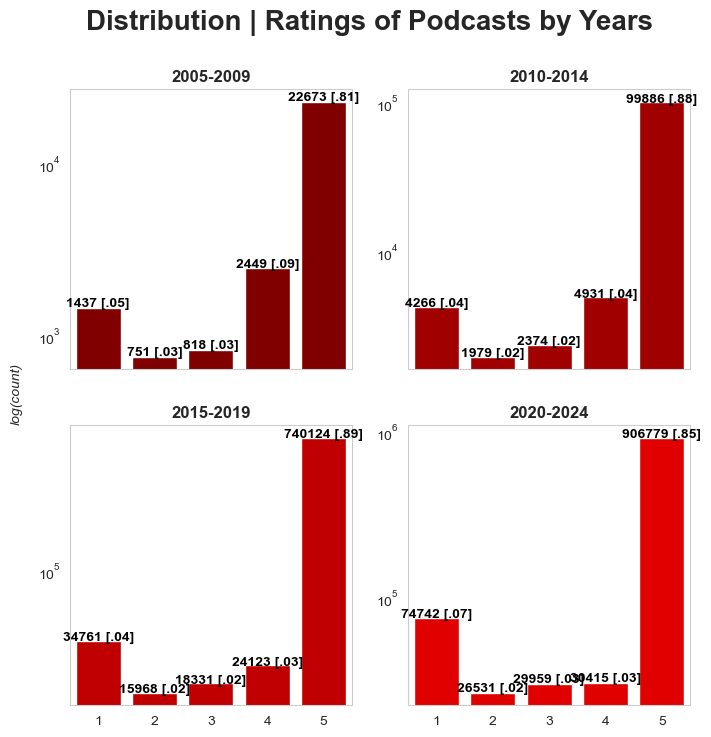

In [15]:
# Group Reviews data in 5-year ranges (e.g. 01/2005-12/2009)
Reviews_5y = Reviews.groupby(pd.Grouper(key='created_at', freq='5Y'))
yearRanges = pd.Series(Reviews_5y.groups.keys()).dt.year
years = Reviews['created_at'].dt.year//5*5

# Create subplots
figure, axes = plt.subplots(
    nrows=2,
    ncols=2,
    # sharey='all',
    dpi=100,
    figsize=(8, 8)
)

axes = np.array(axes).flatten()

for (i, ax), year in zip(enumerate(axes), np.sort(years.unique())):
    data = Reviews[years == year]['rating']
    counts = np.bincount(data)[1:]
    for bar in ax.bar(
        np.arange(len(counts)) + 1,
        counts,
        color=colors[i],
        alpha=1
    ):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, 1.15*height,
                    f'{int(height)} [{str(round(int(height)/len(data), 2))[1:]}]',
                    ha='center', va='top', color='black', fontweight='bold')

    ax.set_title(f'{year}-{year + 4}', fontsize=12, fontweight='bold')
    if i < 2:
        ax.set_xticklabels([])
    if not i%2:
        ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.set_xlim(0.5, 5.5)
    ax.grid(visible=False)

# Adjust layout and title
figure.text(.05, .5, 'log(count)', va='center', rotation='vertical', style='italic')
figure.suptitle(
    'Distribution | Ratings of Podcasts by Years\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)

# Display the plot
plt.show()


...........................

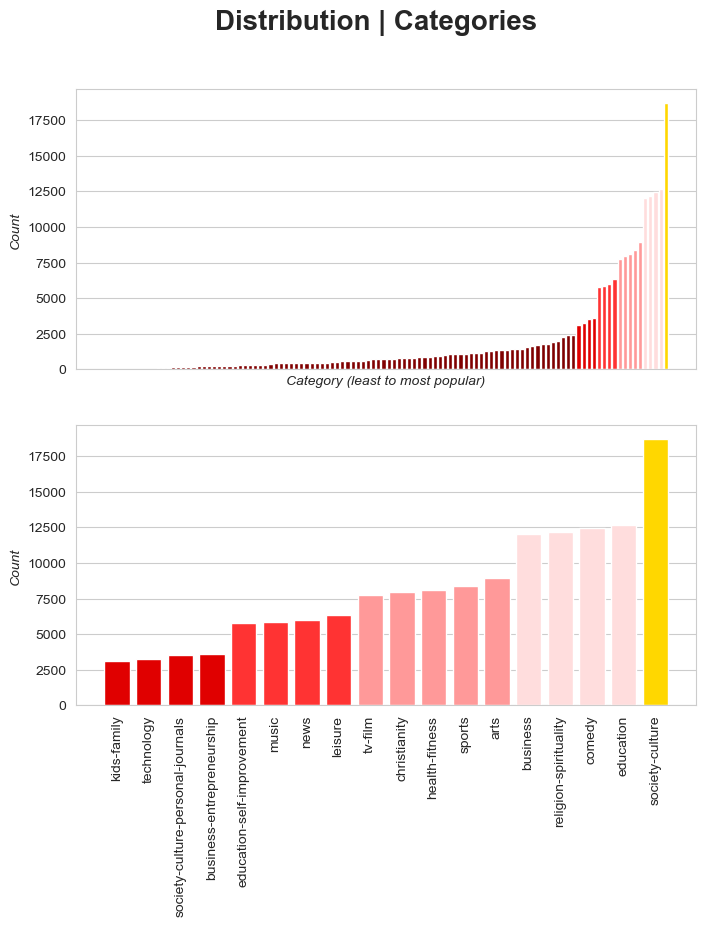

In [16]:
# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=1,
    nrows=2,
    dpi=100,
    figsize=(8, 8)
)

axes = np.array(axes).flatten()
colors_special = [colors[3]]*4 + [colors[5]]*4 + [colors[7]]*5 + [colors[9]]*4 + ['gold']

# Bar chart of distribution of categories
counts = Categories['category'].value_counts(ascending=True)
axes[0].bar(range(110), counts, color=[colors[0]]*92 + colors_special)

axes[0].set_xlabel('Category (least to most popular)', style='italic')
axes[0].set_ylabel('Count', style='italic')
axes[0].set_xticks([])

# Bar chart of 17 categories with similar counts
axes[1].bar(counts.index[92:], counts.iloc[92:], color=colors_special)

axes[1].set_ylabel('Count', style='italic')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='x')

# Adjust layout and title
figure.suptitle(
    'Distribution | Categories',
    fontsize=20,
    fontweight='bold'

)

plt.show()


...............................

In [17]:
# Analyze the similarity between different categories
Categories_pivot = Categories.pivot(index='podcast_id', columns='category', values='category').notnull()\
    .astype(int)
correlations_categories = Categories_pivot.corr()

groups = []
for i, col in enumerate(correlations_categories.columns):
    added = False
    for group in groups:
        if any(correlations_categories.loc[col, category] >= .15 for category in group):
            group.append(col)
            added = True
            break

    if not added:
        groups.append([col])

for i, group in enumerate(groups):
    print(f"Group {i + 1}: {', '.join(group)}")

# Add genres for each category
genres = (
    'arts', 'religion', 'business', 'business', 'religion', 'comedy', 'comedy', 'education', 'fiction',
    'government', 'health', 'religion', 'history', 'religion', 'religion', 'kids', 'leisure', 'leisure',
    'leisure', 'leisure', 'leisure', 'music', 'news', 'religion', 'science', 'science', 'science',
    'science', 'science', 'society-culture', 'society-culture', 'sports', 'sports', 'sports', 'sports',
    'sports', 'sports', 'sports', 'sports', 'sports', 'true-crime', 'tv-film-info', 'tv-film-info'
)

d = {category: genres[_] for _ in range(len(genres)) for category in groups[_]}
Categories['genre'] = Categories['category'].map(d)


Group 1: arts, arts-books, arts-design, arts-fashion-beauty, arts-food, arts-performing-arts, arts-visual-arts
Group 2: buddhism
Group 3: business, business-careers, business-entrepreneurship, business-investing, business-management, business-marketing
Group 4: business-non-profit
Group 5: christianity, religion-spirituality, spirituality
Group 6: comedy, comedy-comedy-interviews, comedy-improv
Group 7: comedy-stand-up
Group 8: education, education-courses, education-how-to, education-language-learning, education-self-improvement
Group 9: fiction, fiction-comedy-fiction, fiction-drama, fiction-science-fiction
Group 10: government
Group 11: health-fitness, health-fitness-alternative-health, health-fitness-fitness, health-fitness-medicine, health-fitness-mental-health, health-fitness-nutrition, health-fitness-sexuality
Group 12: hinduism
Group 13: history
Group 14: islam
Group 15: judaism
Group 16: kids-family, kids-family-education-for-kids, kids-family-parenting, kids-family-pets-anima

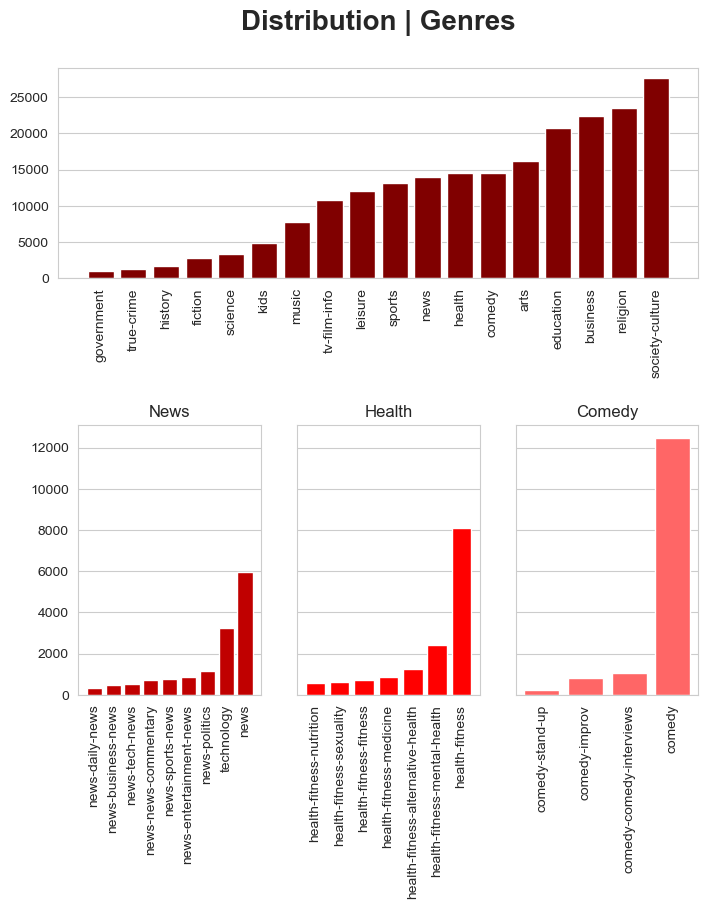

In [18]:
# Create a figure with subplots
figure = plt.figure(dpi=100, figsize=(8, 7))
subfigures = figure.subfigures(2, 1)

axes_top = subfigures[0].subplots(1, 1)
axes = subfigures[1].subplots(1, 3, sharey=True)
axes = np.array(axes).flatten()

# Prepare plotting data
axes = np.insert(axes, 0, axes_top)
gen = ('genre', 'news', 'health', 'comedy')


def makebarchart(i):
    # Create bar chart
    counts = Categories['genre'].value_counts(ascending=True) if gen[i] == 'genre' else \
        Categories['category'][Categories['genre'] ==  gen[i]].value_counts(ascending=True)

    axes[i].bar(counts.index, counts, color=colors[i*2])

    if i < 2:
        ax.set_ylabel('Count', style='italic')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(axis='x')
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False)  # Hide x-axis ticks on top

    # Adjust layout and title
    if not i:
        axes[i].set_position([.1, .3, .8, .6])
        axes[i].set_title(
            'Distribution | Genres\n',
            fontsize=20,
            fontweight='bold'
        )
    else:
        axes[i].set_title(
            gen[i].capitalize(),
            fontsize=12
        )

    return


tuple(makebarchart(_) for _ in range(4))

plt.show()


...........................

## Exploratory Data Analysis

In [19]:
# Create an aggregation of all data
Data = pd.merge(
    Reviews[['podcast_id', 'rating', 'created_at']],
    Categories[['podcast_id', 'category', 'genre']],
    on='podcast_id'
)

Data.recap(n_rows=10)


Number of Observations: 4529483; 
Number of Features: 5.
- Categorical features: category, genre; 
- Numerical features: podcast_id, rating.


,podcast_id,rating,created_at,category,genre
0,1,5,2017-11-29 12:16:43-07:00,business,business
1,2,5,2019-10-08 04:23:32-07:00,christianity,religion
2,2,5,2019-10-08 04:23:32-07:00,religion-spirituality,religion
3,3,1,2011-09-06 14:11:08-07:00,religion-spirituality,religion
4,3,1,2011-09-06 14:11:08-07:00,spirituality,religion
5,4,5,2018-01-16 18:57:38-07:00,business,business
6,4,5,2018-01-16 18:57:38-07:00,business-investing,business
7,4,5,2018-01-18 21:59:11-07:00,business,business
8,4,5,2018-01-18 21:59:11-07:00,business-investing,business
9,4,5,2018-05-11 18:40:15-07:00,business,business


### Quantitative measures of Categories dataset:

In [20]:
# Create dataset to store data of Categories
Categories_info = pd.DataFrame(d, index=['genre']).T

# Number of podcasts
Categories_info['n_podcasts'] = Categories['category'].value_counts()

# Number of reviews
Categories_info['n_reviews'] = Data['category'].value_counts()

# Average rating
Categories_info['rating_avr'] = Data.groupby('category')['rating'].mean()

# Recap
Categories_info.recap(n_rows=10)


Number of Observations: 110; 
Number of Features: 4.
- Categorical features: genre; 
- Numerical features: n_podcasts, n_reviews, rating_avr.


,genre,n_podcasts,n_reviews,rating_avr
arts,arts,8953,136508,4.727782
arts-books,arts,1978,30613,4.681933
arts-design,arts,596,9431,4.811367
arts-fashion-beauty,arts,610,14945,4.649716
arts-food,arts,1074,16556,4.781107
arts-performing-arts,arts,1805,30404,4.703888
arts-visual-arts,arts,1137,16638,4.822154
buddhism,religion,141,1313,4.773039
business,business,12058,210081,4.839410
business-careers,business,2445,53921,4.890061


In [21]:
Categories_info.describe().T

,count,mean,std,min,25%,50%,75%,max
n_podcasts,110.0,1930.654545,3258.322196,14.000000,288.250000,727.000000,1568.500000,18710.000000
n_reviews,110.0,41177.118182,68781.039431,84.000000,5876.500000,17769.000000,38433.000000,441874.000000
rating_avr,110.0,4.695710,0.174850,3.965203,4.612307,4.752511,4.817755,4.988024


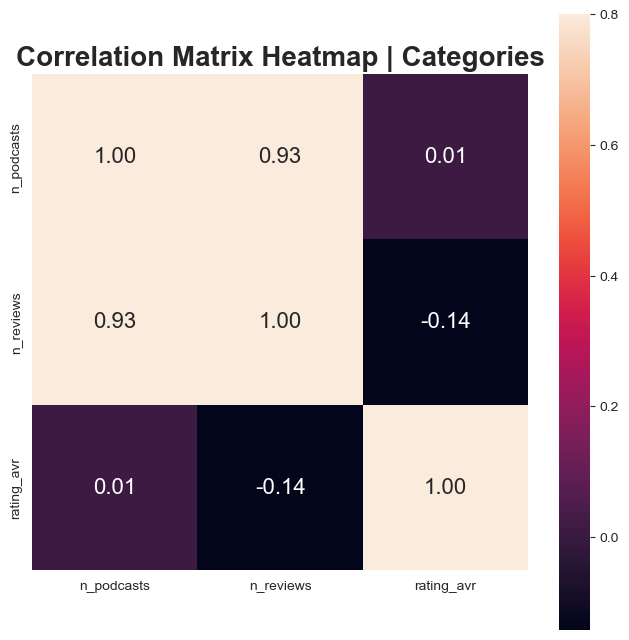

In [22]:
Categories_info.corr_heatmap(title='categories')

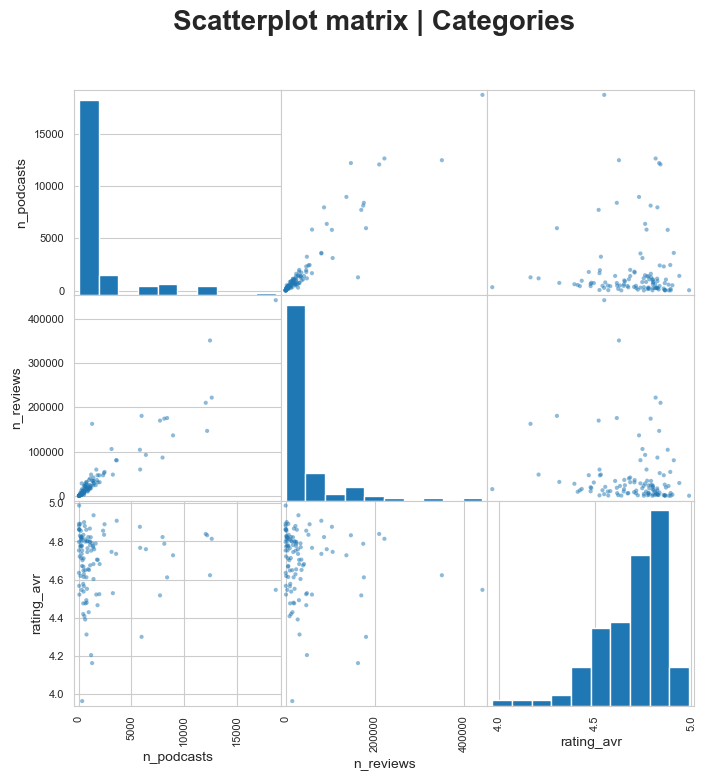

In [23]:
# Create scatterplots for all pairs of columns
pd.plotting.scatter_matrix(Categories_info, figsize=(8, 8), alpha=0.5, diagonal='hist')

# Add plot title
plt.suptitle(
    'Scatterplot matrix | Categories',
    fontsize=20,
    fontweight='bold'

)

# Show the plot
plt.show()

### Quantitative measures of Podcast dataset:

In [24]:
# Create dataset to store data of Podcasts
Podcasts_info = Podcasts.copy()

# Number of reviews
Podcasts_info['n_reviews'] = Data['podcast_id'].value_counts()

# Number of categories
Podcasts_info['category'] = Categories.groupby(by='podcast_id')['category'].agg(set)
Podcasts_info['n_categories'] = Podcasts_info['category'].apply(len)

# Number of genres
Podcasts_info['genre'] = Categories.groupby(by='podcast_id')['genre'].agg(set)
Podcasts_info['n_genres'] = Podcasts_info['genre'].apply(len)

# Average ratings
Podcasts_info['rating_avr'] = Data.groupby('podcast_id')['rating'].mean()

# Time first review was created
Podcasts_info['first_created'] = Data.groupby('podcast_id')['created_at'].min()
Podcasts_info['first_created_n'] = Podcasts_info['first_created'].apply(lambda x: x.timestamp())/10**9

# Recap
Podcasts_info.recap(n_rows=10)


Number of Observations: 110024; 
Number of Features: 9.
- Categorical features: title, category, genre; 
- Numerical features: n_reviews, n_categories, n_genres, rating_avr, first_created_n.


,title,n_reviews,category,n_categories,genre,n_genres,rating_avr,first_created,first_created_n
podcast_id,,,,,,,,,
1,Scaling Global,1,{business},1,{business},1,5.0000,2017-11-29 12:16:43-07:00,1.511983
2,Cornerstone Baptist Church of Orlando,2,"{religion-spirituality, christianity}",2,{religion},1,5.0000,2019-10-08 04:23:32-07:00,1.570534
3,Mystery: Dancing in the Dark,2,"{religion-spirituality, spirituality}",2,{religion},1,1.0000,2011-09-06 14:11:08-07:00,1.315343
4,KTs Money Matters,8,"{business-investing, business}",2,{business},1,5.0000,2018-01-16 18:57:38-07:00,1.516154
5,Word on the Street w/ Dreak Swift,2,{news-entertainment-news},1,{news},1,5.0000,2021-05-10 11:27:43-07:00,1.620671
6,Speedway Soccer,30,"{arts, sports}",2,"{arts, sports}",2,5.0000,2018-01-31 21:09:40-07:00,1.517458
7,Showing Up for You,2,"{education-self-improvement, education}",2,{education},1,5.0000,2022-02-16 22:50:57-07:00,1.645077
8,"Bethany Baptist Church, Bellflower CA",6,"{religion-spirituality, christianity}",2,{religion},1,5.0000,2017-09-16 17:24:35-07:00,1.505608
9,Mindful Communication Podcast,12,"{society-culture-philosophy, society-culture, ...",3,"{society-culture, education}",2,5.0000,2019-02-04 07:56:33-07:00,1.549292


In [25]:
Podcasts_info.describe().T

,count,mean,std,min,25%,50%,75%,max
n_reviews,110024.0,41.168136,304.389492,1.00000,2.000000,4.000000,15.000000,33104.000000
n_categories,110024.0,1.930233,0.974477,1.00000,1.000000,2.000000,2.000000,8.000000
n_genres,110024.0,1.277594,0.476660,1.00000,1.000000,1.000000,2.000000,5.000000
rating_avr,110024.0,4.810112,0.568038,1.00000,5.000000,5.000000,5.000000,5.000000
first_created_n,110024.0,1.539081,0.098946,1.13419,1.508386,1.566236,1.606146,1.673914


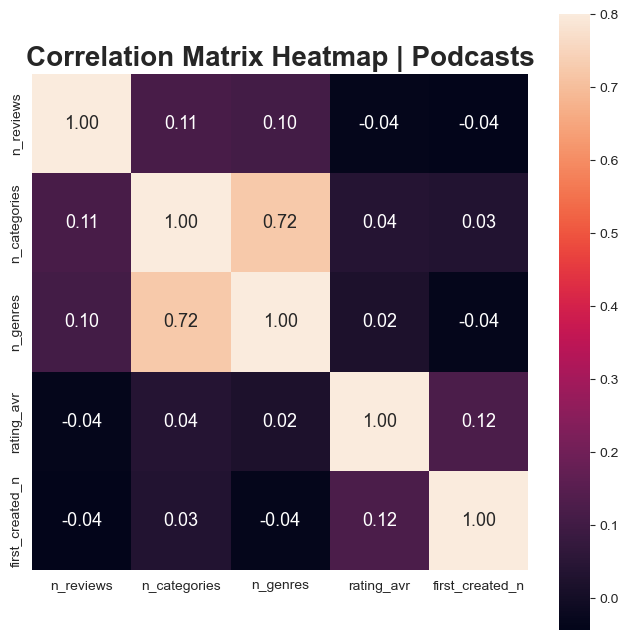

In [26]:
Podcasts_info.corr_heatmap(title='podcasts')

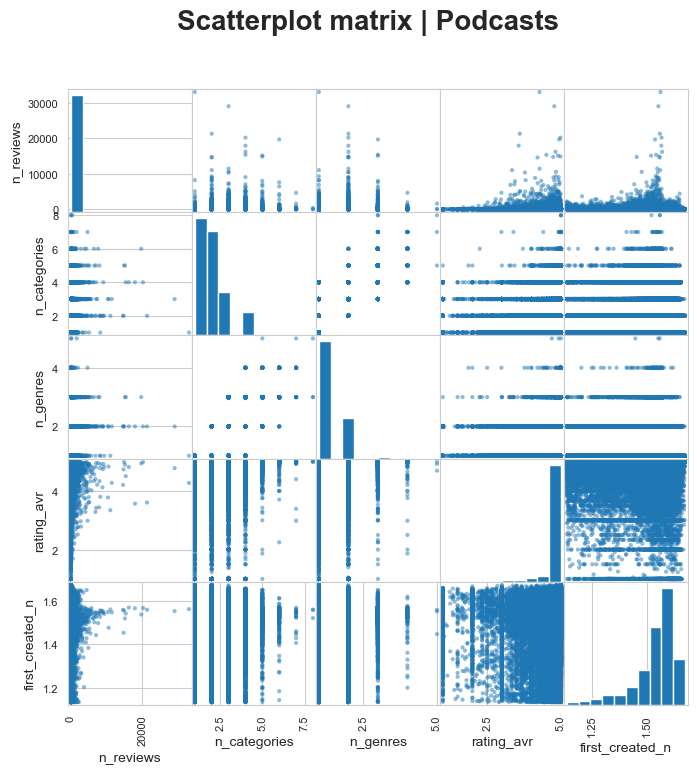

In [27]:
# Create scatterplots for all pairs of columns
scatter_matrix = pd.plotting.scatter_matrix(Podcasts_info, figsize=(8, 8), alpha=0.5, diagonal='hist')

# Add plot title
plt.suptitle(
    'Scatterplot matrix | Podcasts',
    fontsize=20,
    fontweight='bold'

)

# Show the plot
plt.show()

### Quantitative measures of Reviews dataset:

In [28]:
# Create dataset to store data of Reviews
Reviews_info = pd.DataFrame({
    'podcast_id': Reviews['podcast_id'],
    'i_review': 0,
    'rating': Reviews['rating'],
    'rating_curr': 0,
    'rating_prev':0,
    'length_title': Reviews['title'].apply(len),
    'length_content': Reviews['content'].apply(len),
    'created_at': Reviews['created_at'],
    'created_at_n': Reviews['created_at'].apply(lambda x: x.timestamp())/10**9
})

# Order of review
Reviews_info['i_review'] = Reviews.groupby('podcast_id').cumcount() + 1

# Rolling rating
Reviews_info['rating_curr'] = Reviews.groupby('podcast_id')['rating'].expanding().mean().reset_index(level=0, drop=True)
Reviews_info['rating_curr'] = Reviews_info.groupby('podcast_id')['rating_curr'].shift()

# Previous rating
Reviews_info['rating_prev'] = Reviews_info.groupby('podcast_id')['rating'].shift()

# Recap
Reviews_info.recap(n_rows=10)


Number of Observations: 2043297; 
Number of Features: 9.
- Categorical features: ; 
- Numerical features: podcast_id, i_review, rating, rating_curr, rating_prev, length_title, length_content, created_at_n.


,podcast_id,i_review,rating,rating_curr,rating_prev,length_title,length_content,created_at,created_at_n
604710,1,1,5,NaN,NaN,16,26,2017-11-29 12:16:43-07:00,1.511983
604711,2,1,5,NaN,NaN,12,144,2019-10-08 04:23:32-07:00,1.570534
604712,3,1,1,NaN,NaN,5,71,2011-09-06 14:11:08-07:00,1.315343
99854,4,1,5,NaN,NaN,24,94,2018-01-16 18:57:38-07:00,1.516154
99853,4,2,5,5.0,5.0,16,140,2018-01-18 21:59:11-07:00,1.516338
99856,4,3,5,5.0,5.0,25,202,2018-05-11 18:40:15-07:00,1.526089
99855,4,4,5,5.0,5.0,15,460,2018-11-24 17:06:55-07:00,1.543104
2007618,5,1,5,NaN,NaN,10,95,2021-05-10 11:27:43-07:00,1.620671
2007619,5,2,5,5.0,5.0,16,105,2021-07-06 13:57:57-07:00,1.625605
568839,6,1,5,NaN,NaN,36,37,2018-01-31 21:09:40-07:00,1.517458


In [29]:
Reviews_info.describe().T

,count,mean,std,min,25%,50%,75%,max
podcast_id,2043297.0,54546.292050,31249.480574,1.00000,28905.000000,53450.000000,81485.000000,110024.000000
i_review,2043297.0,624.264949,2544.607788,1.00000,12.000000,71.000000,315.000000,33104.000000
rating,2043297.0,4.627370,1.045739,1.00000,5.000000,5.000000,5.000000,5.000000
rating_curr,1933273.0,4.696038,0.479646,1.00000,4.600000,4.900000,5.000000,5.000000
rating_prev,1933273.0,4.620307,1.054698,1.00000,5.000000,5.000000,5.000000,5.000000
length_title,2043297.0,19.751498,12.151165,0.00000,11.000000,17.000000,26.000000,100.000000
length_content,2043297.0,239.257534,240.711088,20.00000,95.000000,177.000000,304.000000,6000.000000
created_at_n,2043297.0,1.561519,0.086629,1.13419,1.530033,1.581542,1.617848,1.676562


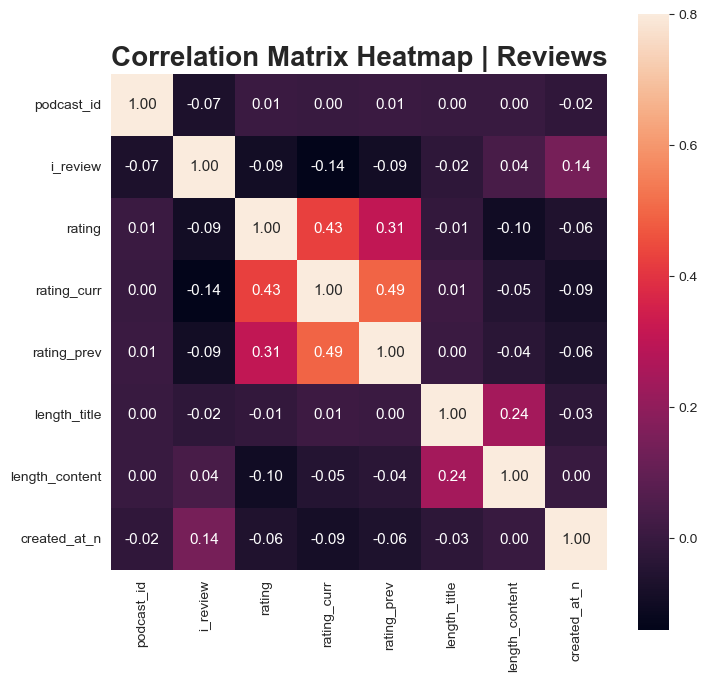

In [30]:
Reviews_info.corr_heatmap(title='reviews')

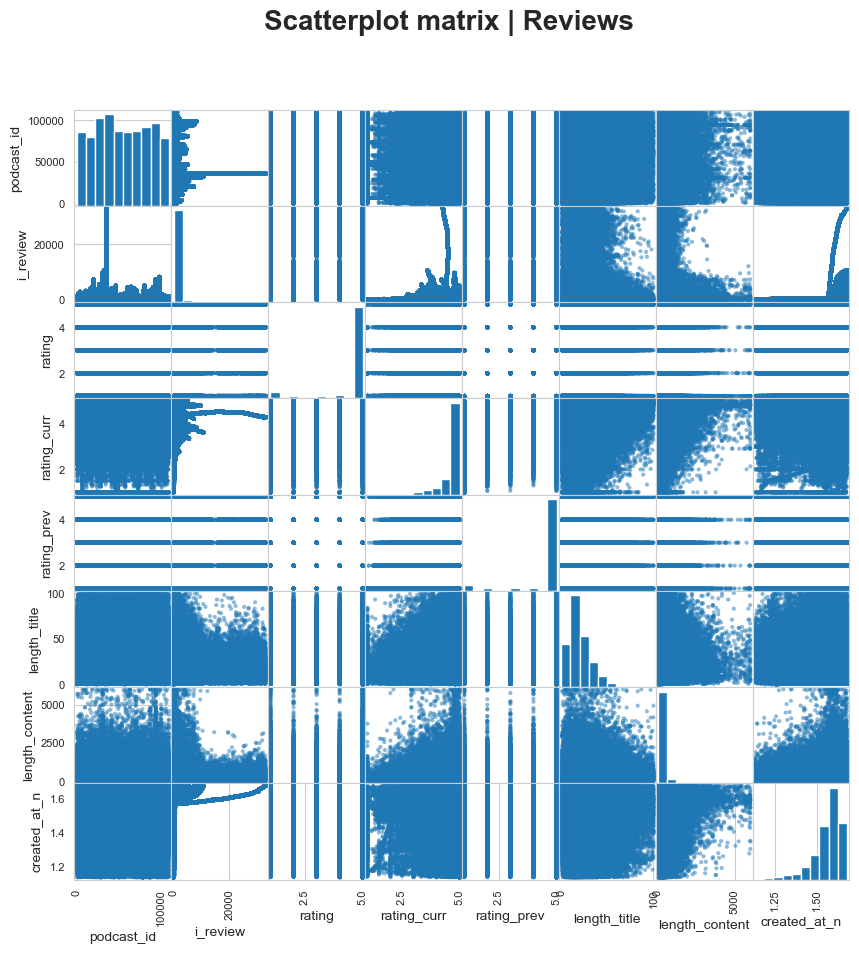

In [31]:
# Create scatterplots for all pairs of columns
pd.plotting.scatter_matrix(Reviews_info, figsize=(10, 10), alpha=0.5, diagonal='hist')

# Add plot title
plt.suptitle(
    'Scatterplot matrix | Reviews',
    fontsize=20,
    fontweight='bold'

)

# Rotate x- and y-axis labels
for ax in scatter_matrix.ravel():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)

# Show the plot
plt.show()

### 1. How are the frequencies of words used correlated with different ratings?

In [32]:
# Function to remove unimportant words from text
def remove_words(text, words):
    text = text.lower().replace('’', '')

    for word in words:
        text = text.replace(f' {word}', '').replace(f'{word} ', '')

    for letter in 'abcdefghijklmnopqrstuvwxyz':
        text = text.replace(f' {letter} ', ' ')

    return text


# Functon to create word-cloud plots
def create_wordCloud(data, words_rm, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 20
                         ).generate(remove_words(" ".join(data.values), words_rm))
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=50, fontweight='bold')
    plt.show()


words = (
    'podcasts', 'podcast',
    'listening', 'listener', 'listened', 'listens', 'listen',
    'showing', 'shows', 'show',
    'episodes', 'episode',
    'people',
    'hosts', 'host',
    'loves', 'lover', 'love',
    'ones', 'one',
    'make',
    'time'
)

# create_wordCloud(Reviews['content'], words_rm=words, title="All")

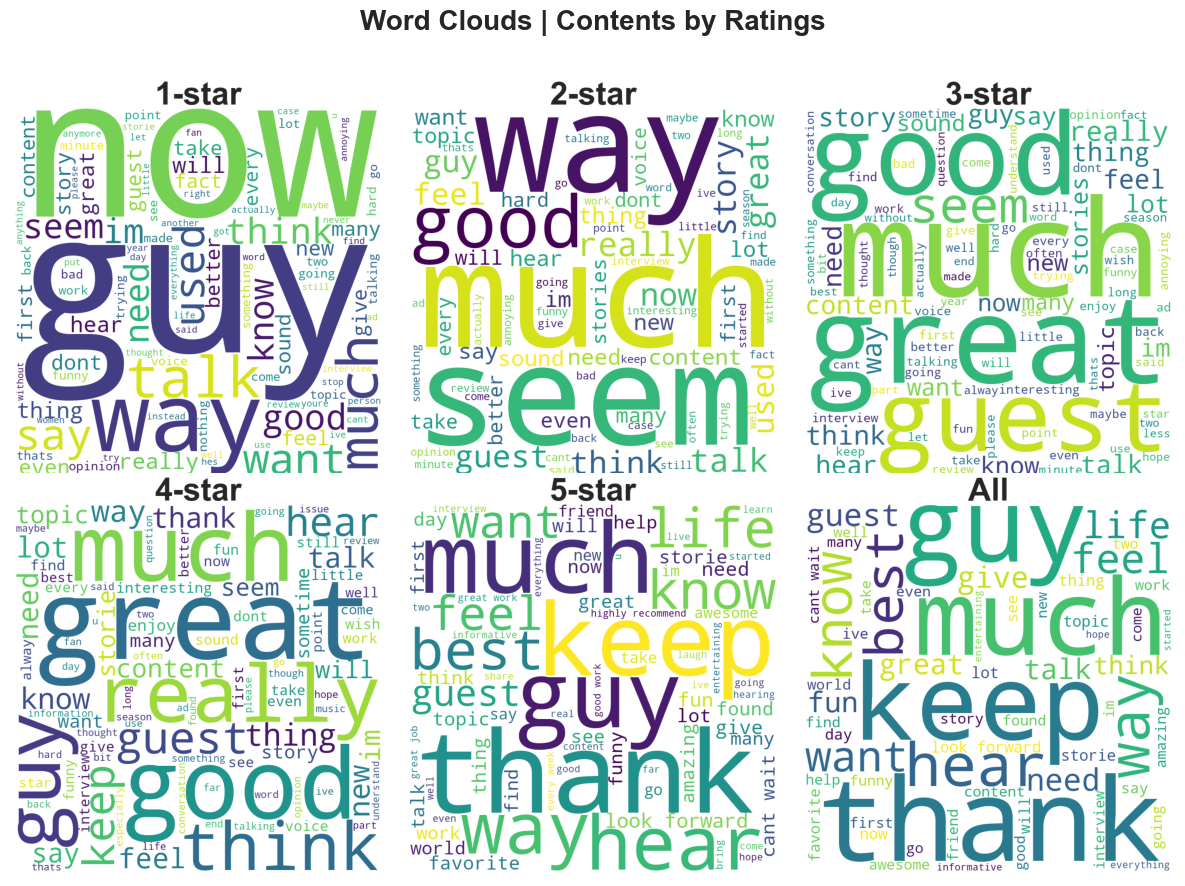

In [33]:
# Create subplots
figure, axes = plt.subplots(
    nrows=2,
    ncols=3,
    # sharey='all',
    dpi=100,
    figsize=(12, 9)
)

axes = np.array(axes).flatten()

for i in range(6):
    axes[i].imshow(mpimg.imread(f'./plots/cloud_{i + 1}.png'))
    axes[i].axis('off')


# Adjust layout and title
figure.suptitle(
    'Word Clouds | Contents by Ratings\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
plt.tight_layout()

# Display the plot
plt.show()

### 2. Does the number of categories/genres affect the distribution of average ratings of podcasts?

<Figure size 800x800 with 0 Axes>

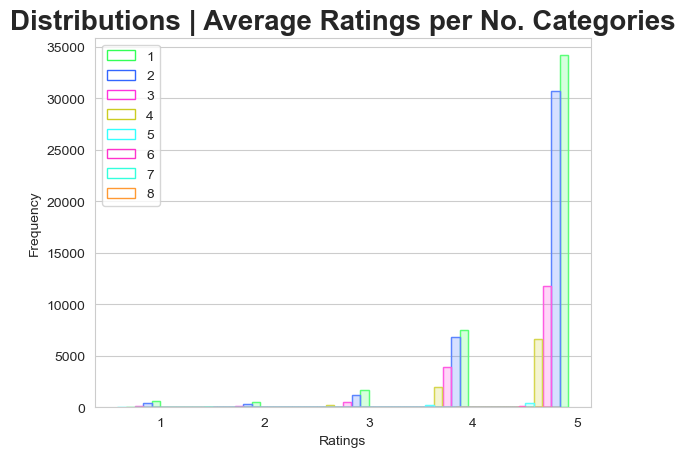

In [34]:
# Create a boxplot for each number of categories
plt.figure(figsize=(8, 8))
Podcasts_info_g = Podcasts_info.groupby('n_categories')

fig, ax = plt.subplots()
rainbow = [
    '#FF5733',  # Red
    '#33FF57',  # Green
    '#3366FF',  # Blue
    '#FF33DD',  # Pink
    '#CCCC22',  # Yellow
    '#33FFFF',  # Cyan
    '#FF33CC',  # Magenta
    '#33FFDD',  # Teal
    '#FF9933',  # Orange
    '#9933FF',  # Purple
]

for group, group_data in Podcasts_info_g:
    ax.hist(group_data['rating_avr'].astype(int) - group/12, bins=50, label=group,
            alpha=1, fill=False, edgecolor=rainbow[group])
    ax.hist(group_data['rating_avr'].astype(int) - group/12, bins=50,
            alpha=.2, fill=True, color=rainbow[group])

# Customize the plot
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
ax.set_title(
    "Distributions | Average Ratings per No. Categories",
    fontsize=20,
    fontweight='bold'
)

ax.legend()
ax.xaxis.grid(False)

# Show the plot
plt.show()


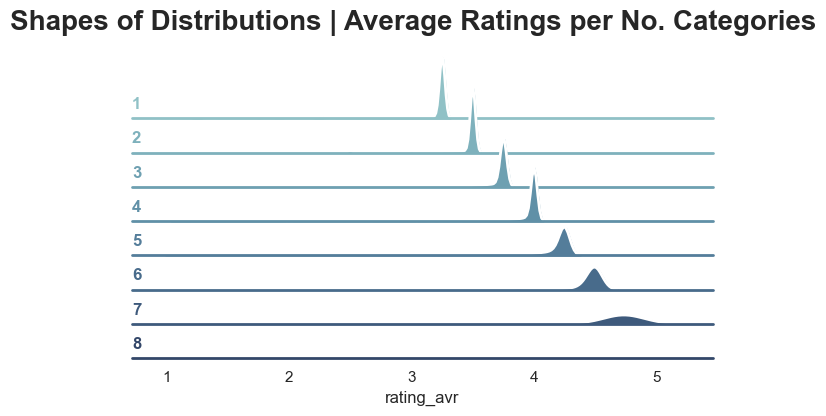

In [35]:
# Set plot theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Organize data for plot
data = pd.DataFrame({
        'n_categories': Podcasts_info['n_categories'],
        'rating_avr': Podcasts_info['rating_avr'] + Podcasts_info['n_categories']/4 - 2
    })

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    data[data['rating_avr'] > 1],
    row="n_categories",
    hue="n_categories",
    aspect=15,
    height=.5,
    palette=pal
)

# Draw the densities
g.map(sns.kdeplot, "rating_avr",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, "rating_avr", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "rating_avr")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Add plot title
plt.suptitle(
    'Shapes of Distributions | Average Ratings per No. Categories',
    fontsize=20,
    fontweight='bold'

)

# Show the plot
plt.show()

<Figure size 800x800 with 0 Axes>

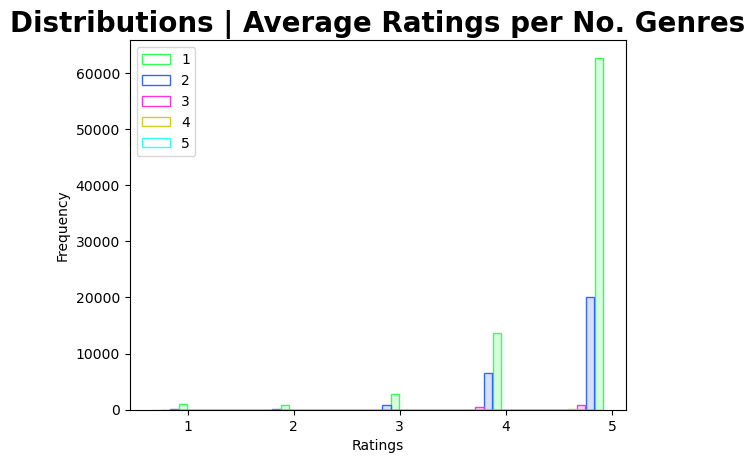

In [50]:
# Set the Matplotlib style back to default
plt.style.use('default')

# Create a boxplot for each number of categories
plt.figure(figsize=(8, 8))
Podcasts_info_g = Podcasts_info.groupby('n_genres')

fig, ax = plt.subplots()

for group, group_data in Podcasts_info_g:
    ax.hist(group_data['rating_avr'].astype(int) - group/12, bins=50, label=group,
            alpha=1, fill=False, edgecolor=rainbow[group])
    ax.hist(group_data['rating_avr'].astype(int) - group/12, bins=50,
            alpha=.2, fill=True, color=rainbow[group])

# Customize the plot
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')
ax.set_title(
    "Distributions | Average Ratings per No. Genres",
    fontsize=20,
    fontweight='bold'
)

# Get the legend and set the background color
ax.legend()

# Remove horizontal axis
ax.xaxis.grid(False)

# Show the plot
plt.show()


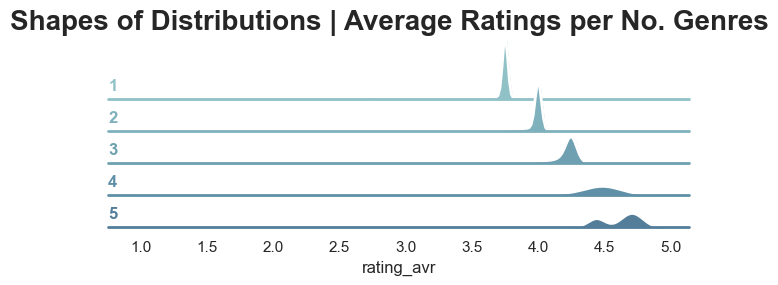

In [37]:
# Set plot theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Organize data for plot
data = pd.DataFrame({
        'n_genres': Podcasts_info['n_genres'],
        'rating_avr': Podcasts_info['rating_avr'] + Podcasts_info['n_genres']/4 - 1.5
    })

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    data[data['rating_avr'] > 1],
    row="n_genres",
    hue="n_genres",
    aspect=15,
    height=.5,
    palette=pal
)

# Draw the densities
g.map(sns.kdeplot, "rating_avr",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, "rating_avr", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "rating_avr")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Add plot title
plt.suptitle(
    'Shapes of Distributions | Average Ratings per No. Genres',
    fontsize=20,
    fontweight='bold'

)

# Show the plot
plt.show()

### 3. How do rolling ratings change for the most popular/reviewed podcasts?

In [38]:
podcasts_top5 = Podcasts_info.nlargest(5, 'n_reviews')
podcasts_top5


,title,n_reviews,category,n_categories,genre,n_genres,rating_avr,first_created,first_created_n
podcast_id,,,,,,,,,
35970,Crime Junkie,33104,{true-crime},1,{true-crime},1,4.274982,2019-07-04 07:37:10-07:00,1.562251
30874,Wow in the World,29094,"{kids-family, kids-family-stories-for-kids, ed...",3,"{kids, education}",2,4.776243,2019-03-15 16:58:30-07:00,1.552694
32532,My Favorite Murder with Karen Kilgariff and Ge...,21350,"{true-crime, comedy}",2,"{true-crime, comedy}",2,3.605714,2019-05-30 08:46:28-07:00,1.559231
80694,Know Your Aura with Mystic Michaela,20236,"{religion-spirituality, education-self-improve...",4,"{religion, education}",2,4.983594,2019-08-30 05:52:41-07:00,1.567170
79105,Don't Keep Your Day Job,19728,"{spirituality, religion-spirituality, business...",6,"{religion, business, education}",3,4.940085,2018-09-17 17:37:33-07:00,1.537231


In [39]:
Reviews_info_top5 = Reviews_info[Reviews_info['podcast_id'].isin(podcasts_top5.index)]
Reviews_info_top5.recap(n_rows=10)

Number of Observations: 61824; 
Number of Features: 9.
- Categorical features: ; 
- Numerical features: podcast_id, i_review, rating, rating_curr, rating_prev, length_title, length_content, created_at_n.


,podcast_id,i_review,rating,rating_curr,rating_prev,length_title,length_content,created_at,created_at_n
265865,30874,1,5,NaN,NaN,16,45,2019-03-15 16:58:30-07:00,1.552694
265895,30874,2,5,5.000000,5.0,17,171,2019-03-15 17:38:36-07:00,1.552697
265870,30874,3,3,5.000000,5.0,23,168,2019-03-15 21:16:51-07:00,1.552710
265885,30874,4,5,4.333333,3.0,24,98,2019-03-18 14:35:22-07:00,1.552945
265871,30874,5,5,4.500000,5.0,8,60,2019-03-18 17:38:18-07:00,1.552956
265907,30874,6,1,4.600000,5.0,19,84,2019-03-18 17:51:48-07:00,1.552957
265896,30874,7,1,4.000000,1.0,21,150,2019-03-19 06:58:46-07:00,1.553004
265876,30874,8,5,3.571429,1.0,20,841,2019-03-19 17:25:46-07:00,1.553042
265864,30874,9,5,3.750000,5.0,26,186,2019-03-19 18:57:41-07:00,1.553047
265882,30874,10,5,3.888889,5.0,16,56,2019-03-20 03:45:13-07:00,1.553079


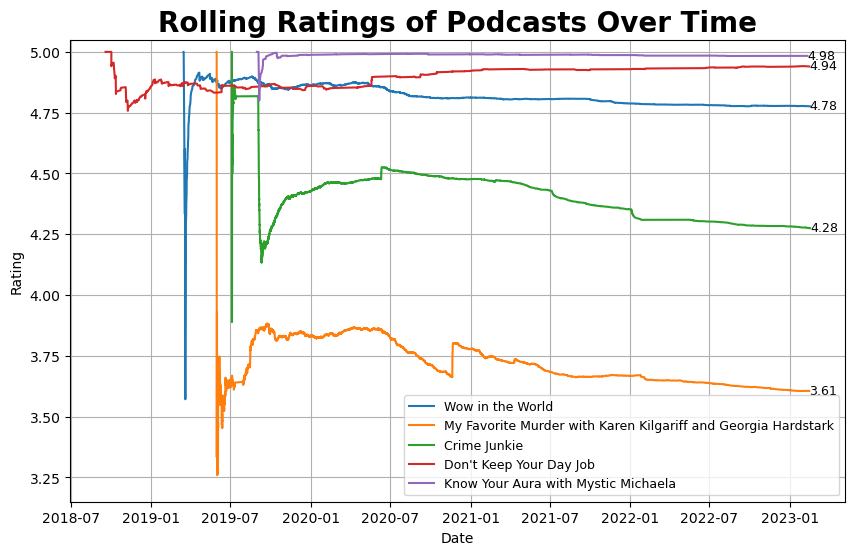

In [51]:
# Set the Matplotlib style back to default
plt.style.use('default')

# Group the Reviews by 'podcast_id'
Reviews_info_top5_g = Reviews_info_top5.groupby('podcast_id')

# Plot the time series for each group
plt.figure(figsize=(10, 6))
for id, group in Reviews_info_top5_g:
    plt.plot(group['created_at'], group['rating_curr'], label=Podcasts_info.loc[id]['title'])
    last_date = group['created_at'].iloc[-1]
    last_value = group['rating_curr'].iloc[-1]
    plt.text(last_date, last_value - .025, round(last_value, 2), ha='left', va='bottom', fontsize=9)

# Customize the plot
plt.title(
    'Rolling Ratings of Podcasts Over Time',
    fontsize=20,
    fontweight='bold'
)

plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend(fontsize=9)
plt.ylim(3.15, 5.05)

# Show the plot
plt.grid(True)
plt.show()


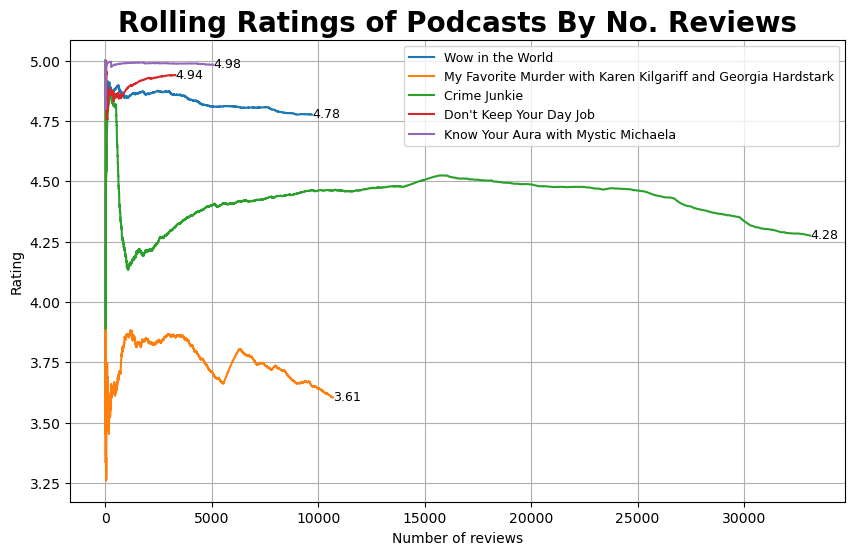

In [52]:
# Group the Reviews by 'podcast_id'
Reviews_info_top5_g = Reviews_info_top5.groupby('podcast_id')

# Plot the time series for each group
plt.figure(figsize=(10, 6))
for id, group in Reviews_info_top5_g:
    plt.plot(group['i_review'], group['rating_curr'], label=Podcasts_info.loc[id]['title'])
    x_last = group['i_review'].iloc[-1]
    y_last = group['rating_curr'].iloc[-1]
    plt.text(x_last, y_last - .025, round(y_last, 2), ha='left', va='bottom', fontsize=9)

# Customize the plot
plt.title(
    'Rolling Ratings of Podcasts By No. Reviews',
    fontsize=20,
    fontweight='bold'
)

plt.xlabel('Number of reviews')
plt.ylabel('Rating')
plt.legend(fontsize=9)

# Show the plot
plt.grid(True)
plt.show()


## Modeling
...

### Stratified splitting of reviews data into training and testing sets:
Because our reviews datasets may have classes that are significantly fewer samples than others, this method is
used to ensure that the class distribution in the training and testing sets is similar.

In [42]:
# Create an aggregation of reviews ratings, contents, categories, and genres
Data = pd.merge(
    Reviews[['podcast_id', 'rating', 'content']],
    Podcasts_info.reset_index()[['podcast_id', 'category', 'genre']],
    on='podcast_id'
)

Data.drop(columns=['podcast_id'], inplace=True)

Data.recap(n_rows=10)

Number of Observations: 2043297; 
Number of Features: 4.
- Categorical features: content, category, genre; 
- Numerical features: rating.


,rating,content,category,genre
0,5,Great variety of speakers!,{business},{business}
1,5,I'm a regular listener. I only wish that the ...,"{religion-spirituality, christianity}",{religion}
2,1,Thts so weird... However made tht is weird. Du...,"{religion-spirituality, spirituality}",{religion}
3,5,"So excited to have this come to reality, well ...","{business-investing, business}",{business}
4,5,Really enjoy this podcast! Quick and to the po...,"{business-investing, business}",{business}
5,5,Inspiration & Information that transforms busi...,"{business-investing, business}",{business}
6,5,"Hi KT, I love listening to your show and I hav...","{business-investing, business}",{business}
7,5,Word on the Street w/ Dreak Swift is one of th...,{news-entertainment-news},{news}
8,5,"Best podcast ever, don’t want to miss out plus...",{news-entertainment-news},{news}
9,5,Independent Nashville Soccer Content.,"{arts, sports}","{arts, sports}"


In [43]:
# Extract relevant data
ratings_reviews = Data[['rating', 'content']]

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(Data[['content', 'category', 'genre']], Data['rating']):
    df_train, df_test = ratings_reviews.loc[train_index], ratings_reviews.loc[test_index]


In [44]:
df_train.recap(n_rows=10)

Number of Observations: 1634637; 
Number of Features: 2.
- Categorical features: content; 
- Numerical features: rating.


,rating,content
831659,5,I agree that it good. It good fun too
362525,5,You live so long gathering information and try...
1861163,5,Tony hosts a great show with some of the most ...
1432670,5,Thank you so much for such a great podcast. I’...
641304,4,"Ususally, the stories are interesting and info..."
830248,5,"Super helpful, & enjoyable."
1019495,5,Thank you Father. You found your niche. Hope y...
549010,5,"5 star reviews only ❤️, been a fan for a while..."
1641322,1,I used to love Jackie bc she’s a boss ... unti...
346061,5,Seriously. I love these twos. I laugh OUT LOUD...


In [45]:
df_test.recap(n_rows=10)

Number of Observations: 408660; 
Number of Features: 2.
- Categorical features: content; 
- Numerical features: rating.


,rating,content
184996,5,So glad there is s new choice for morning spor...
898327,5,I wonder how many reviews I can do! Great job ...
1105446,5,This podcast is awesome and Lane helps you und...
1398104,5,"I like that the podcasts are short, good for k..."
1976521,3,Can’t do the OMG uptick of every sentence. Lik...
1003997,5,"These episodes never fail in making you laugh,..."
288133,1,Good if you wanna listen to a pro sexual assau...
2018518,5,I stumbled upon this podcast search for Gabby ...
1627449,5,These guys are absolute rammers. \n5 stars.
1475277,5,Humphrey Camadella Productions comes through w...


### Preparing data for BERT:
To use BERT, we need to format the data as follows:

- Column 0: A row ID. (Needed for both train and test data.)
- Column 1: A class label. (Needed only for train data.)
- Column 2: A dummy column with the same letter for all rows. (Needed only for train data, because BERT expects it.)
- Column 3: The text to classify. (Needed for both train and test data.)

We also need to split the data into two files called train and dev for training, and optionally a third file called test without labels for testing. Finally, we need to save the files as .tsv, since BERT does not accept .csv files.


In [46]:
# Creating training dataframe according to BERT by adding the required columns
df_bert = pd.DataFrame({
    'id':range(len(df_train)),
    'label':df_train['rating'],
    'alpha':['a']*df_train.shape[0],
    'text': df_train['content'].replace(r'\n', ' ', regex=True)
})


# Splitting training data file into *train* and *dev*
df_bert_train, df_bert_dev = train_test_split(df_bert, test_size=0.01)

df_bert_train.recap(n_rows=10)

Number of Observations: 1618290; 
Number of Features: 4.
- Categorical features: alpha, text; 
- Numerical features: id, label.


,id,label,alpha,text
297896,902869,5,a,So funny and so real. Nice to have something d...
966892,1583937,3,a,Been here since the beginning and I used to lo...
1194808,1527661,3,a,"If you’re going to do bachelor recaps, actuall..."
163912,1335586,5,a,I just started watching and I am having a lot ...
1509314,81385,5,a,Rabbi Weinstein has distilled the essence of r...
549724,1511609,5,a,Great podcast by WSO
979884,903467,5,a,It took me a bit of time but these lovable guy...
1349067,1566822,5,a,"Just recently found this series, and have been..."
1975244,1075306,3,a,I’ve noticed Karina is getting some speech pat...
858882,985883,5,a,My name is Rosa Sisniega @salonRRER In Hollyw...


In [47]:
# Creating test dataframe according to BERT
df_bert_test = pd.DataFrame({
    'id':range(len(df_test)),
    'text': df_test['content'].replace(r'\n', ' ', regex=True)
})

df_bert_test.recap(n_rows=10)

Number of Observations: 408660; 
Number of Features: 2.
- Categorical features: text; 
- Numerical features: id.


,id,text
184996,0,So glad there is s new choice for morning spor...
898327,1,I wonder how many reviews I can do! Great job ...
1105446,2,This podcast is awesome and Lane helps you und...
1398104,3,"I like that the podcasts are short, good for k..."
1976521,4,Can’t do the OMG uptick of every sentence. Lik...
1003997,5,"These episodes never fail in making you laugh,..."
288133,6,Good if you wanna listen to a pro sexual assau...
2018518,7,I stumbled upon this podcast search for Gabby ...
1627449,8,These guys are absolute rammers. 5 stars.
1475277,9,Humphrey Camadella Productions comes through w...


In [48]:
# Saving dataframes to .tsv format as required by BERT
df_bert_train.to_csv('bert/data/train.tsv', sep='\t', index=False, header=False)
df_bert_dev.to_csv('bert/data/dev.tsv', sep='\t', index=False, header=False)
df_bert_test.to_csv('bert/data/test.tsv', sep='\t', index=False, header=False)


In [49]:
df_test = pd.read_csv('bert/data/test.tsv', sep='\t', names=['id', 'text'])

# Read the results data for the probabilities
df_result = pd.read_csv('bert/bert_output/test_results.tsv', sep='\t', header=None)  #create a new dataframe
df_map_result = pd.DataFrame({'id': df_test['id'],
    'text': df_test['text'],
    'label': df_result.idxmax(axis=1)})  #view sample rows of the newly created dataframe

df_map_result.sample(100)


FileNotFoundError: [Errno 2] No such file or directory: 'bert/bert_output/test_results.tsv'

## Testing & Evaluation
Two-Sample t-test for Comparing Average Ratings:

Null Hypothesis (H0): The average ratings of two genres are equal.
Alternative Hypothesis (H1): The average ratings of genres are different.

In [ ]:
# Prepare datasets to store test statistics and p-values
genres_unique = tuple(set(genres))
data_t_test = pd.DataFrame(0, index=genres_unique, columns=genres_unique)
data_p_value = data_t_test.copy()

# Extract data for the two genres
ratings_genres = tuple(
    Data['rating'][Data['genre'] == genres_unique[_]]
    for _ in range(len(genres_unique))
)

for i in range(len(genres_unique)):
    for j in range(i + 1, len(genres_unique)):
        # Perform the Two-Sample t-test
        t_statistic, p_value = sp.stats.ttest_ind(ratings_genres[i], ratings_genres[j])

        # Add the results to the t_test_results and p-value tables
        data_t_test.loc[genres_unique[i], genres_unique[j]] = round(t_statistic, 2)
        data_p_value.loc[genres_unique[i], genres_unique[j]] = round(p_value, 2)


In [ ]:
data_t_test

In [ ]:
data_p_value

In [ ]:
# Select pairs of genres with p-values > 0.05
data_p_value_triu = data_p_value.where(np.triu(np.ones(data_p_value.shape), k=1).astype(bool))
p_values_large = data_p_value_triu[data_p_value > 0.05].stack().reset_index()
p_values_large.index += 1

# Display table of features with highly negative correlations
print('High p-values:'.upper())
print(tabulate(p_values_large, tablefmt='Simple'))


In [ ]:
# Universal function to check if an element is in a set of a data of sets
def in_set(data, item):
    return item in data


in_set = np.frompyfunc(in_set, 2, 1)

# Extract data for the two genres
ratings_avr_genres = tuple(
    Podcasts_info['rating_avr'][in_set(Podcasts_info['genre'], genres_unique[_])]
    for _ in range(len(genres_unique))
)

for i in range(len(genres_unique)):
    for j in range(i + 1, len(genres_unique)):
        # Perform the Two-Sample t-test
        t_statistic, p_value = sp.stats.ttest_ind(ratings_avr_genres[i], ratings_avr_genres[j])

        # Add the results to the t_test_results and p-value tables
        data_t_test.loc[genres_unique[i], genres_unique[j]] = round(t_statistic, 2)
        data_p_value.loc[genres_unique[i], genres_unique[j]] = round(p_value, 2)


In [ ]:
# Select pairs of genres with p-values > 0.05
data_p_value_triu = data_p_value.where(np.triu(np.ones(data_p_value.shape), k=1).astype(bool))
p_values_large = data_p_value_triu[data_p_value > 0.05].stack().reset_index()
p_values_large.index += 1

# Display table of features with highly negative correlations
print('High p-values:'.upper())
print(tabulate(p_values_large, tablefmt='Simple'))

In [ ]:
# Universal function to check if a set of a data of sets has only 1 element
def only_elem(data, item):
    return {item} == data


only_elem = np.frompyfunc(only_elem, 2, 1)

# Extract data for the two genres
ratings_avr_genres = tuple(
    Podcasts_info['rating_avr'][only_elem(Podcasts_info['genre'], genres_unique[_])]
    for _ in range(len(genres_unique))
)

for i in range(len(genres_unique)):
    for j in range(i + 1, len(genres_unique)):
        # Perform the Two-Sample t-test
        t_statistic, p_value = sp.stats.ttest_ind(ratings_avr_genres[i], ratings_avr_genres[j])

        # Add the results to the t_test_results and p-value tables
        data_t_test.loc[genres_unique[i], genres_unique[j]] = round(t_statistic, 2)
        data_p_value.loc[genres_unique[i], genres_unique[j]] = round(p_value, 2)


In [ ]:
# Select pairs of genres with p-values > 0.05
data_p_value_triu = data_p_value.where(np.triu(np.ones(data_p_value.shape), k=1).astype(bool))
p_values_large = data_p_value_triu[data_p_value > 0.05].stack().reset_index()
p_values_large.index += 1

# Display table of features with highly negative correlations
print('High p-values:'.upper())
print(tabulate(p_values_large, tablefmt='Simple'))

## Results Interpretation
...


## Suggestions & Recommendations
...


## Conclusion
...
